<a href="https://colab.research.google.com/github/Aditya-pro-stack/Movie_Recommendation_System/blob/main/Cartoon_Effect_on_Image_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Load image

In [42]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img



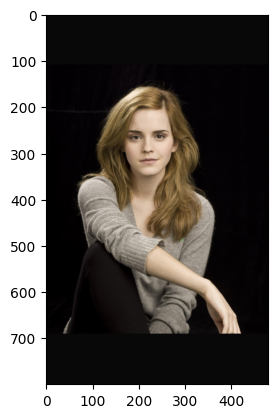

In [43]:
filename = "/content/Screen_20200330_122319.png"
img = read_file(filename)

org_img = np.copy(img)

Create Edge Mask


In [44]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

  return edges

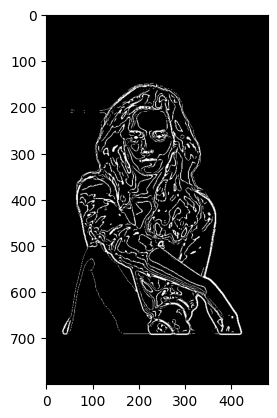

In [52]:
line_size, blur_value = 7, 7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap = "binary")
plt.show()

Redduce Color pallete

In [53]:
def color_quantization(img, k):

  # Transform the umage
  data = np.float32(img).reshape((-1, 3))

  # Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  # Implementing K-Means

  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

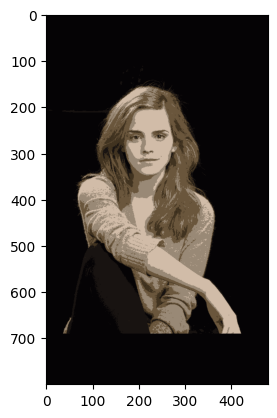

In [54]:
img = color_quantization(img, k = 9)
plt.imshow(img)
plt.show()

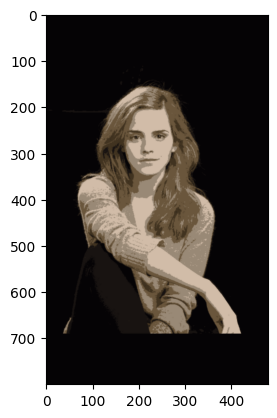

In [55]:
# Reduce the noise
blurred = cv2.bilateralFilter(img, d = 3, sigmaColor = 200, sigmaSpace = 200)

plt.imshow(blurred)
plt.show()

Combine Edge Mask with quantiz img


In [57]:
def cartoon():
  c = cv2.bitwise_and(blurred, blurred, mask = edges)

  plt.imshow(c)
  plt.title("cartoonified_img")
  plt.show()

  plt.imshow(org_img)
  plt.title("org_img")
  plt.show()

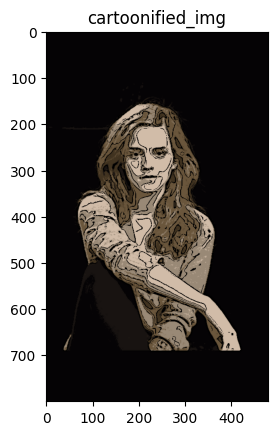

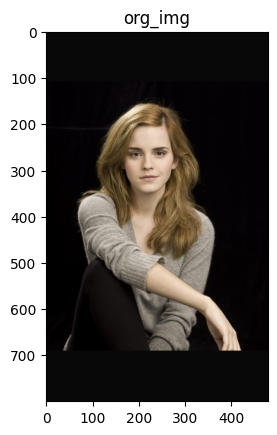

In [58]:
cartoon()